# IMDB Sentimental Analysis 

## Step 1: Loading the dataset
---

In [2]:
import os
print(os.listdir("../input"))
import warnings
warnings.filterwarnings('ignore')

import pandas as pd

#importing the training data
imdb_data=pd.read_csv('../input/IMDB Dataset.csv')
print(imdb_data.shape)


(50000, 2)


In [3]:
#Summary of the dataset
imdb_data.head(10)
imdb_data.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,negative
freq,5,25000


In [4]:
#sentiment count
imdb_data['sentiment'].value_counts()

negative    25000
positive    25000
Name: sentiment, dtype: int64

## Step 2: Splitting the dataset
---

In [5]:
#split the dataset  
#train dataset
train_reviews = imdb_data.review[:40000]
train_sentiments = imdb_data.sentiment[:40000]

#test dataset
test_reviews = imdb_data.review[40000:]
test_sentiments = imdb_data.sentiment[40000:]

print(train_reviews.shape,train_sentiments.shape)
print(test_reviews.shape,test_sentiments.shape)

(40000,) (40000,)
(10000,) (10000,)


# Step 3: Data Cleaning
---

In [ ]:
# Data Cleaning import
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup
import re,string,unicodedata
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem import LancasterStemmer,WordNetLemmatizer

### 1. Text normalization

In [6]:
#Tokenization of text
tokenizer=ToktokTokenizer()

#Setting English stopwords
stopword_list=nltk.corpus.stopwords.words('english')

### 2. Removing the noise and HTML Strips

In [7]:
#Removing the html strips
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

#Removing the square brackets
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)

#Removing the noisy text
def denoise_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    return text

#Apply denoise text function to review data
imdb_data['review']=imdb_data['review'].apply(denoise_text)

### 3. Removing special characters

In [8]:
#Function defination for removing special characters
def remove_special_characters(text, remove_digits=True):
    pattern=r'[^a-zA-z0-9\s]'
    text=re.sub(pattern,'',text)
    return text

#Apply function on review column to remove the special characters
imdb_data['review'] = imdb_data['review'].apply(remove_special_characters)

### 4. Text Stemming

In [9]:
#Stemming the text
def simple_stemmer(text):
    ps=nltk.porter.PorterStemmer()
    text= ' '.join([ps.stem(word) for word in text.split()])
    return text

#Apply stemming function
imdb_data['review'] = imdb_data['review'].apply(simple_stemmer)

### 5.Removing stopwords

In [10]:
#set stopwords to english
stop=set(stopwords.words('english'))
print(stop)

#removing the stopwords
def remove_stopwords(text, is_lower_case=False):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopword_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text

#Apply function to remove the stop words 
imdb_data['review']=imdb_data['review'].apply(remove_stopwords)

{'we', "hasn't", 'about', "you'll", 'had', 'am', "wouldn't", "couldn't", 'him', 'once', 'should', 'after', 'under', 'down', 'o', 'herself', 'some', 'me', 'our', 'a', 'will', "aren't", "shan't", 'in', 'ourselves', 'or', 'by', "wasn't", 'these', 'he', 'against', 'up', 'its', 's', "shouldn't", 'here', 'how', 'they', 'll', 'shouldn', 'between', 'out', 'few', 'at', 'before', "won't", 'theirs', 't', 'needn', 'too', 'both', 'weren', "you'd", 'own', 'above', 'd', 'then', 'isn', 'wouldn', 'below', "it's", 'off', 'just', 'couldn', 'which', 'did', 'any', 'very', 've', 'doesn', 'you', 'for', "needn't", "mustn't", 'is', 'as', 'mightn', 'what', 'yourself', 'won', 're', 'their', "haven't", 'now', "you've", 'yours', 'are', 'wasn', 'other', 'has', 'does', 'hadn', 'into', 'i', 'and', 'of', 'hasn', 'each', 'the', "doesn't", 'to', "she's", 'aren', 'ma', 'only', 'because', 'myself', 'having', 'being', 'so', 'his', "you're", 'your', 'can', 'hers', 'again', 'm', 'until', 'ours', 'an', 'this', 'from', 'such',

In [11]:
#train reviews
train_reviews = imdb_data.review[:40000]

#test reviews
test_reviews=imdb_data.review[40000:]

# Step 4 - Creating Vectorizers - TF-IDF and Bag of Words
---

### 1. Bags of words model

It is used to convert text documents to numerical vectors or bag of words.

In [12]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer

#Count vectorizer for bag of words
cv = CountVectorizer(min_df=0,max_df=1,binary=False,ngram_range=(1,3))

#transformed train reviews
cv_train_reviews = cv.fit_transform(train_reviews)

#transformed test reviews
cv_test_reviews = cv.transform(test_reviews)

print('BOW_cv_train:',cv_train_reviews.shape)
print('BOW_cv_test:',cv_test_reviews.shape)


BOW_cv_train: (40000, 6209089)
BOW_cv_test: (10000, 6209089)


### 2. Term Frequency-Inverse Document Frequency model (TFIDF)

It is used to convert text documents to  matrix of  TF-IDF features.

In [13]:
#Tfidf vectorizer
tv=TfidfVectorizer(min_df=0,max_df=1,use_idf=True,ngram_range=(1,3))

#transformed train reviews
tv_train_reviews=tv.fit_transform(train_reviews)

#transformed test reviews
tv_test_reviews=tv.transform(test_reviews)

print('Tfidf_train:',tv_train_reviews.shape)
print('Tfidf_test:',tv_test_reviews.shape)

Tfidf_train: (40000, 6209089)
Tfidf_test: (10000, 6209089)


# Step 5 - Labeling the sentiment text
---

### 1. Labeling

In [14]:
#labeling the sentient data
lb = LabelBinarizer()

#transformed sentiment data
sentiment_data=lb.fit_transform(imdb_data['sentiment'])

print(sentiment_data.shape)

(50000, 1)


### 2. Split the sentiment data

In [15]:
#Spliting the sentiment data
train_sentiments=sentiment_data[:40000]
test_sentiments=sentiment_data[40000:]
print(train_sentiments)
print(test_sentiments)

[[1]
 [1]
 [1]
 ...
 [1]
 [0]
 [0]]
[[0]
 [0]
 [0]
 ...
 [0]
 [0]
 [0]]


# Step 6 - Modelling the DataSet
---

In [ ]:
# Modelling imports
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

### A. Logistic Regression

#### 1.  Creating model using BoW and TF-IDF

In [16]:
#training the model
lr = LogisticRegression(penalty='l2',max_iter=500,C=1,random_state=42)

#Fitting the model for Bag of words
lr_bow = lr.fit(cv_train_reviews, train_sentiments)
print(lr_bow)

#Fitting the model for tfidf features
lr_tfidf = lr.fit(tv_train_reviews, train_sentiments)
print(lr_tfidf)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=42, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)
LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=42, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)


#### 2. Checking of LR model performane on test dataset

In [17]:
#Predicting the model for bag of words
lr_bow_predict = lr.predict(cv_test_reviews)
print(lr_bow_predict)

##Predicting the model for tfidf features
lr_tfidf_predict = lr.predict(tv_test_reviews)
print(lr_tfidf_predict)

[0 0 0 ... 0 1 1]
[0 0 0 ... 0 1 1]


#### 3. Accuracy of the LR models

In [18]:
#Accuracy score for bag of words
lr_bow_score=accuracy_score(test_sentiments,lr_bow_predict)
print("lr_bow_score :",lr_bow_score)

#Accuracy score for tfidf features
lr_tfidf_score=accuracy_score(test_sentiments,lr_tfidf_predict)
print("lr_tfidf_score :",lr_tfidf_score)

lr_bow_score : 0.7512
lr_tfidf_score : 0.75


#### 4. Classification Report

In [19]:
#Classification report for bag of words 
lr_bow_report = classification_report(test_sentiments,lr_bow_predict,target_names=['Positive','Negative'])
print(lr_bow_report)

#Classification report for tfidf features
lr_tfidf_report = classification_report(test_sentiments,lr_tfidf_predict,target_names=['Positive','Negative'])
print(lr_tfidf_report)

              precision    recall  f1-score   support

    Positive       0.75      0.75      0.75      4993
    Negative       0.75      0.75      0.75      5007

    accuracy                           0.75     10000
   macro avg       0.75      0.75      0.75     10000
weighted avg       0.75      0.75      0.75     10000

              precision    recall  f1-score   support

    Positive       0.74      0.77      0.75      4993
    Negative       0.76      0.73      0.75      5007

    accuracy                           0.75     10000
   macro avg       0.75      0.75      0.75     10000
weighted avg       0.75      0.75      0.75     10000



#### 5. Confusion matrix

In [33]:
#confusion matrix for BoW
lr_cm_bow = confusion_matrix(test_sentiments, lr_bow_predict,labels=[1,0])
print(lr_cm_bow)

#confusion matrix for TF-IDF Features
lr_cm_tfidf = confusion_matrix(test_sentiments, lr_tfidf_predict,labels=[1,0])
print(lr_cm_tfidf)

[[3768 1239]
 [1249 3744]]
[[3663 1344]
 [1156 3837]]


### B. Linear SVM

#### 1. Create model for BoW and TF-IDF Feature

In [21]:
#training the linear svm
svm = SGDClassifier(loss='hinge', max_iter=500, random_state=42)

#fitting the svm for bag of words
svm_bow = svm.fit(cv_train_reviews, train_sentiments)
print(svm_bow)

#fitting the svm for tfidf features
svm_tfidf = svm.fit(tv_train_reviews, train_sentiments)
print(svm_tfidf)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=500, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)
SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=500, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)


#### 2. Model performance on test data

In [22]:
#Predicting the model for bag of words
svm_bow_predict = svm.predict(cv_test_reviews)
print(svm_bow_predict)

#Predicting the model for tfidf features
svm_tfidf_predict = svm.predict(tv_test_reviews)
print(svm_tfidf_predict)

[1 1 0 ... 1 1 1]
[1 1 1 ... 1 1 1]


#### 3. Accuracy of SVM models

In [23]:
#Accuracy score for bag of words
svm_bow_score = accuracy_score(test_sentiments, svm_bow_predict)
print("svm_bow_score :", svm_bow_score)

#Accuracy score for tfidf features
svm_tfidf_score = accuracy_score(test_sentiments,svm_tfidf_predict)
print("svm_tfidf_score :", svm_tfidf_score)

svm_bow_score : 0.5829
svm_tfidf_score : 0.5112


#### 4. Print the classification report

In [24]:
#Classification report for bag of words 
svm_bow_report = classification_report(test_sentiments, svm_bow_predict, target_names=['Positive','Negative'])
print(svm_bow_report)

#Classification report for tfidf features
svm_tfidf_report = classification_report(test_sentiments, svm_tfidf_predict, target_names=['Positive','Negative'])
print(svm_tfidf_report)

              precision    recall  f1-score   support

    Positive       0.94      0.18      0.30      4993
    Negative       0.55      0.99      0.70      5007

    accuracy                           0.58     10000
   macro avg       0.74      0.58      0.50     10000
weighted avg       0.74      0.58      0.50     10000

              precision    recall  f1-score   support

    Positive       1.00      0.02      0.04      4993
    Negative       0.51      1.00      0.67      5007

    accuracy                           0.51     10000
   macro avg       0.75      0.51      0.36     10000
weighted avg       0.75      0.51      0.36     10000



#### 5. Plot the confusion matrix

In [34]:
#confusion matrix for bag of words
svm_cm_bow = confusion_matrix(test_sentiments, svm_bow_predict, labels=[1,0])
print(svm_cm_bow)

#confusion matrix for tfidf features
svm_cm_tfidf = confusion_matrix(test_sentiments, svm_tfidf_predict, labels=[1,0])
print(svm_cm_tfidf)

[[4948   59]
 [4112  881]]
[[5007    0]
 [4888  105]]


 ### C. Multinomial Naive Bayes

#### 1. Creating model using BoW and TF-IDF 

In [26]:
#training the model
mnb = MultinomialNB()

#fitting the MNB for bag of words
mnb_bow = mnb.fit(cv_train_reviews, train_sentiments)
print(mnb_bow)

#fitting the MNB for tfidf features
mnb_tfidf = mnb.fit(tv_train_reviews, train_sentiments)
print(mnb_tfidf)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)


#### 2. Model performance on test data

In [27]:
#Predicting the model for bag of words
mnb_bow_predict = mnb.predict(cv_test_reviews)
print(mnb_bow_predict)

#Predicting the model for tfidf features
mnb_tfidf_predict = mnb.predict(tv_test_reviews)
print(mnb_tfidf_predict)

[0 0 0 ... 0 1 1]
[0 0 0 ... 0 1 1]


#### 3. Accuracy of the models

In [28]:
#Accuracy score for BoW
mnb_bow_score = accuracy_score(test_sentiments,mnb_bow_predict)
print("mnb_bow_score :",mnb_bow_score)

#Accuracy score for TF-IDF features
mnb_tfidf_score = accuracy_score(test_sentiments,mnb_tfidf_predict)
print("mnb_tfidf_score :",mnb_tfidf_score)

mnb_bow_score : 0.751
mnb_tfidf_score : 0.7509


#### 4. Print the classification report

In [29]:
#Classification report for BoW
mnb_bow_report = classification_report(test_sentiments,mnb_bow_predict,target_names=['Positive','Negative'])
print(mnb_bow_report)

#Classification report for TF-IDF features
mnb_tfidf_report = classification_report(test_sentiments,mnb_tfidf_predict,target_names=['Positive','Negative'])
print(mnb_tfidf_report)

              precision    recall  f1-score   support

    Positive       0.75      0.76      0.75      4993
    Negative       0.75      0.75      0.75      5007

    accuracy                           0.75     10000
   macro avg       0.75      0.75      0.75     10000
weighted avg       0.75      0.75      0.75     10000

              precision    recall  f1-score   support

    Positive       0.75      0.76      0.75      4993
    Negative       0.75      0.74      0.75      5007

    accuracy                           0.75     10000
   macro avg       0.75      0.75      0.75     10000
weighted avg       0.75      0.75      0.75     10000



### 5. Plot the confusion matrix

In [35]:
#confusion matrix for BoW
mnb_cm_bow = confusion_matrix(test_sentiments, mnb_bow_predict,labels=[1,0])
print(cm_bow)

#confusion matrix for TF-IDF features
mnb_cm_tfidf = confusion_matrix(test_sentiments, mnb_tfidf_predict,labels=[1,0])
print(cm_tfidf)

[[3736 1271]
 [1219 3774]]
[[3729 1278]
 [1213 3780]]


# Step 7 - Comparison Confusion Matrix
---

In [31]:
import matplotlib.pyplot as plt
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
    
plt.figure(figsize=(13,5))

### A. Logistic Regression BoW and TF-IDF Models Confusion Matrix

Normalized confusion matrix
[[0.75254643 0.24745357]
 [0.25015021 0.74984979]]


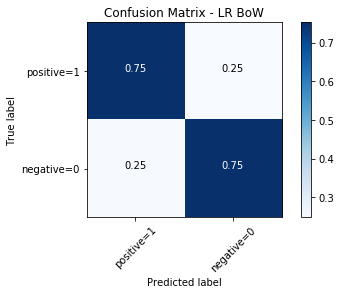

In [38]:
# Plot Normalized Confusion Matrix

plot_confusion_matrix(lr_cm_bow, classes=['positive=1','negative=0'], normalize= True,  title='Confusion Matrix - LR BoW')

Normalized confusion matrix
[[0.73157579 0.26842421]
 [0.23152413 0.76847587]]


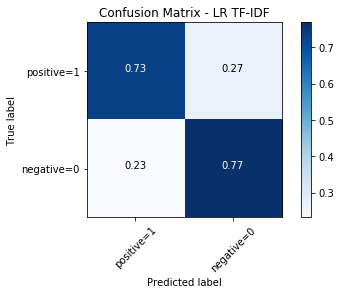

In [37]:
plot_confusion_matrix(lr_cm_tfidf, classes=['positive=1','negative=0'], normalize= True,  title='Confusion Matrix - LR TF-IDF')

### B. SVM -  BoW and TF-IDF Models Confusion Matrix

Normalized confusion matrix
[[0.9882165  0.0117835 ]
 [0.82355297 0.17644703]]


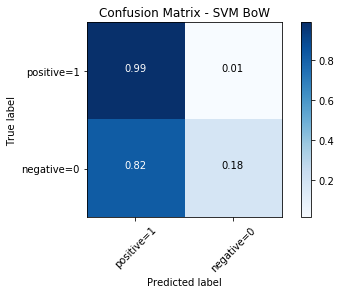

In [39]:
# Plot Normalized Confusion Matrix

plot_confusion_matrix(svm_cm_bow, classes=['positive=1','negative=0'], normalize= True,  title='Confusion Matrix - SVM BoW')

Normalized confusion matrix
[[1.         0.        ]
 [0.97897056 0.02102944]]


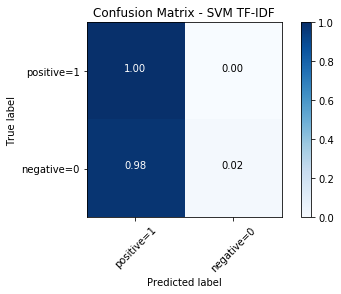

In [41]:
plot_confusion_matrix(svm_cm_tfidf, classes=['positive=1','negative=0'], normalize= True,  title='Confusion Matrix - SVM TF-IDF')

### C. MNB -  BoW and TF-IDF Models Confusion Matrix

Normalized confusion matrix
[[0.74615538 0.25384462]
 [0.2441418  0.7558582 ]]


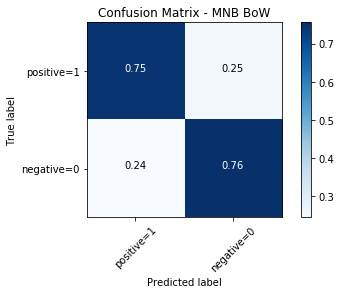

In [42]:
# Plot Normalized Confusion Matrix

plot_confusion_matrix(mnb_cm_bow, classes=['positive=1','negative=0'], normalize= True,  title='Confusion Matrix - MNB BoW')

Normalized confusion matrix
[[0.74475734 0.25524266]
 [0.24294012 0.75705988]]


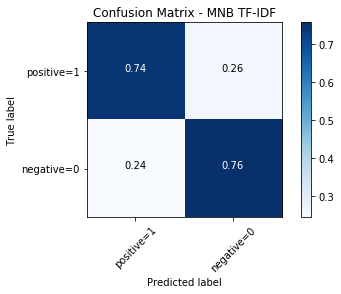

In [43]:
plot_confusion_matrix(mnb_cm_tfidf, classes=['positive=1','negative=0'], normalize= True,  title='Confusion Matrix - MNB TF-IDF')

# Conclusion
----
## We can observed that both logistic regression and multinomial naive bayes model performing well compared to linear support vector  machines.